In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Kerry\alx python\MD_agric_exam-4313.csv')

In [3]:
df.shape

(1000, 10)

In [4]:
df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [5]:
df.isnull().sum()

Field_ID             0
Elevation            0
Rainfall             0
Min_temperature_C    0
Max_temperature_C    0
pH                   0
Pollution_level      0
Plot_size            0
Annual_yield         0
Crop_type            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           1000 non-null   int64  
 1   Elevation          1000 non-null   float64
 2   Rainfall           1000 non-null   float64
 3   Min_temperature_C  1000 non-null   float64
 4   Max_temperature_C  1000 non-null   float64
 5   pH                 1000 non-null   float64
 6   Pollution_level    1000 non-null   float64
 7   Plot_size          1000 non-null   float64
 8   Annual_yield       1000 non-null   float64
 9   Crop_type          1000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [8]:
df.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.397448e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


In [9]:
df.dtypes

Field_ID               int64
Elevation            float64
Rainfall             float64
Min_temperature_C    float64
Max_temperature_C    float64
pH                   float64
Pollution_level      float64
Plot_size            float64
Annual_yield         float64
Crop_type             object
dtype: object

In [10]:
# Get the number of unique crop types
num_unique_crops = df['Crop_type'].nunique()

print(f"Number of unique crop types: {num_unique_crops}")

Number of unique crop types: 8


In [11]:
# Filter for wheat crop type
wheat_df = df[df['Crop_type'] == 'wheat']

# Find the maximum annual yield
max_wheat_yield = wheat_df['Annual_yield'].max()

# Print the result rounded to 2 decimal places
print(f"Maximum annual yield for wheat: {round(max_wheat_yield, 2)}")

Maximum annual yield for wheat: 8.99


In [13]:
# Total rainfall for crop types where average pollution level > 0.2
# Calculate average pollution per crop
avg_pollution = df.groupby('Crop_type')['Pollution_level'].mean()
# Filter for crops with avg pollution > 0.2
high_pollution_crops = avg_pollution[avg_pollution > 0.2].index
# Calculate total rainfall for these crops
total_rainfall_high_pollution = df[df['Crop_type'].isin(high_pollution_crops)]['Rainfall'].sum()

print(f"Total rainfall for crop types with average pollution > 0.2: {total_rainfall_high_pollution:.1f}")

Total rainfall for crop types with average pollution > 0.2: 941959.7


In [14]:
def calculate_temp_range(field_id, dataframe):
    """
    Calculate the temperature range (Max - Min) for a specific field ID.
    """
    # Filter for the specific Field_ID
    field_data = dataframe[dataframe['Field_ID'] == field_id]
    
    if not field_data.empty:
        # Calculate range: Max_temperature_C - Min_temperature_C
        temp_range = field_data['Max_temperature_C'].iloc[0] - field_data['Min_temperature_C'].iloc[0]
        return round(temp_range, 2)
    else:
        return None

# Calling the function for specific Field_IDs
ids_to_check = [1458, 1895, 5443]
results = {fid: calculate_temp_range(fid, df) for fid in ids_to_check}

print(results)

{1458: 40.7, 1895: 35.7, 5443: 33.4}


In [18]:
a = df['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

rice


In [19]:
# Calculate the total plot size for plots where pH is less than 5.5
total_plot_size_low_ph = df[df['pH'] < 5.5]['Plot_size'].sum()

print(f"Total plot size for plots with pH < 5.5: {total_plot_size_low_ph:.1f}")

Total plot size for plots with pH < 5.5: 1731.9


In [20]:
# Create a filtered dataframe with Min_temperature_C < -5 and Max_temperature_C > 30
filtered_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

# Count the number of rows in the filtered dataset
num_rows = len(filtered_df)

print(f"Number of rows in the filtered dataset: {num_rows}")

Number of rows in the filtered dataset: 319


In [21]:
# Calculate the median plot size
median_plot_size = df['Plot_size'].median()

# Filter for plots where Plot_size is larger than the median
filtered_df = df[df['Plot_size'] > median_plot_size]

# Use Numpy to calculate the standard deviation of Rainfall for the filtered plots
rainfall_std = np.std(filtered_df['Rainfall'])

print(f"Standard Deviation of Rainfall for large plots: {round(rainfall_std, 2)}")

Standard Deviation of Rainfall for large plots: 469.62


In [22]:
# Most common Max_temperature_C
max_temp_mode = df['Max_temperature_C'].mode()[0]
print(f"Most common Max_temp: {max_temp_mode}")

# Least common Crop_type
crop_counts = df['Crop_type'].value_counts()
least_common_crop = crop_counts.idxmin()
print(f"Least common crop: {least_common_crop} (count: {crop_counts.min()})")

# Check first three characters vs digits
mode_str = str(max_temp_mode)
first_three_chars = mode_str[:3]
print(f"First three characters of mode: '{first_three_chars}'")

# Check last three letters
last_three_letters = least_common_crop[-3:]
print(f"Last three letters of crop: '{last_three_letters}'")

print(f"Combined string (chars): {first_three_chars}{last_three_letters}")

Most common Max_temp: 30.7
Least common crop: rice (count: 48)
First three characters of mode: '30.'
Last three letters of crop: 'ice'
Combined string (chars): 30.ice


                 count      mean       std       min       25%       50%  \
Elevation_Range                                                            
High             615.0  2.180276  2.031293  0.174857  0.822154  1.545508   
Low               52.0  1.890518  1.697715  0.191298  0.651747  1.491788   
Medium           333.0  1.989066  1.750770  0.199406  0.765509  1.433817   

                      75%        max  
Elevation_Range                       
High             2.615738  12.695224  
Low              2.324002   7.499710  
Medium           2.382951  10.512780  


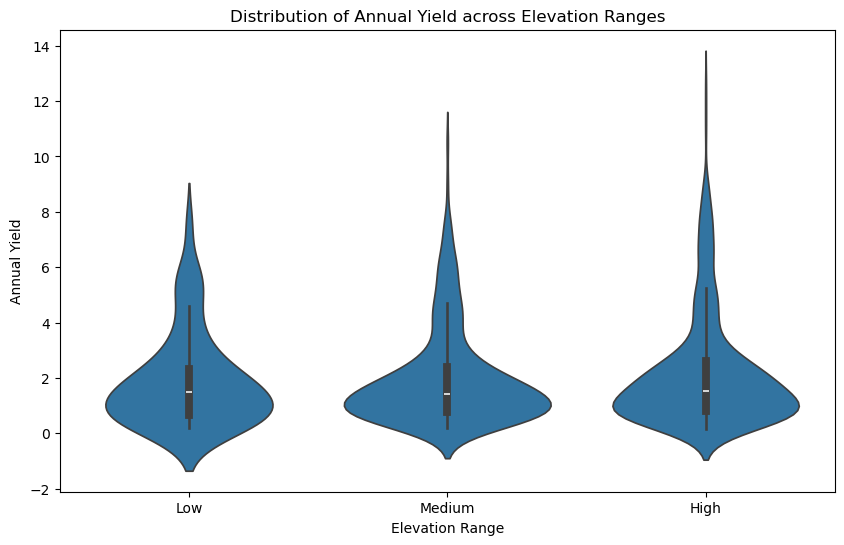

In [23]:
def categorize_elevation(elevation):
    if elevation < 300:
        return 'Low'
    elif 300 <= elevation <= 600:
        return 'Medium'
    else:
        return 'High'

df['Elevation_Range'] = df['Elevation'].apply(categorize_elevation)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Range', y='Annual_yield', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Annual Yield across Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.savefig('elevation_yield_violin.png')

# Print summary stats to help with interpretation
print(df.groupby('Elevation_Range')['Annual_yield'].describe())

In [24]:
# Get unique crop types as a list
unique_crops = df['Crop_type'].unique().tolist()

# Define the recursive function
def sum_crop_lengths(crop_list):
    # Base case: if the list is empty, return 0
    if not crop_list:
        return 0
    # Recursive step: length of the first crop + sum of the remaining crops
    return len(crop_list[0]) + sum_crop_lengths(crop_list[1:])

# Calculate the total sum
total_sum = sum_crop_lengths(unique_crops)

print(f"The total sum is: {total_sum}")

The total sum is: 42


In [26]:
from scipy import stats
# Extract annual yield for coffee and banana
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(coffee_yield, banana_yield)

# Print the p-value rounded to three decimal places
print(f"P-value: {round(p_value, 3)}")

P-value: 0.598
